In [147]:
import numpy as np
import re
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
df = pd.read_csv('titanic-passengers.csv',sep=';')

In [148]:
df.drop('Ticket', inplace=True, axis=1)
df.drop('Fare', inplace=True, axis=1)
df.drop('Cabin', inplace=True, axis=1)

In [149]:
df['Age'] = df.Age.fillna(df.Age.median())
df['Embarked'] = df.Embarked.fillna('S')
df['Survived'].replace('Yes','1',inplace=True)
one_hot=pd.get_dummies(df['Sex'])
df=df.join(one_hot)

SyntaxError: invalid syntax (<ipython-input-149-b8907a96876c>, line 3)

In [150]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [151]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.00,0,0,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.00,0,0,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00,0,4,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.00,1,0,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.00,2,0,S
6,576,No,3,"Patchett, Mr. George",male,19.00,0,0,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.50,0,0,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.00,1,0,S


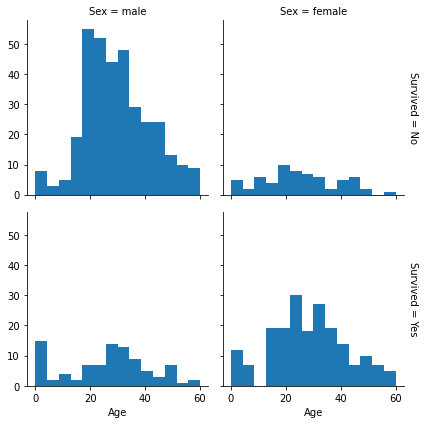

In [152]:
grid = sns.FacetGrid(df, row="Survived", col="Sex", margin_titles=True)
grid.map(plt.hist, "Age", bins=np.linspace(0, 60, 15));

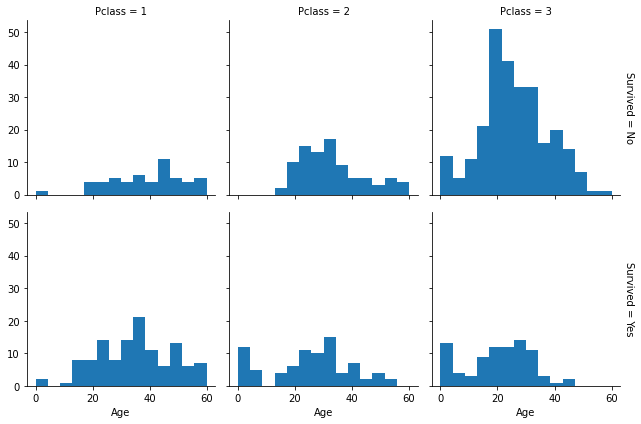

In [153]:
grid = sns.FacetGrid(df, row="Survived", col="Pclass", margin_titles=True)
grid.map(plt.hist, "Age", bins=np.linspace(0, 60, 15));

In [154]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

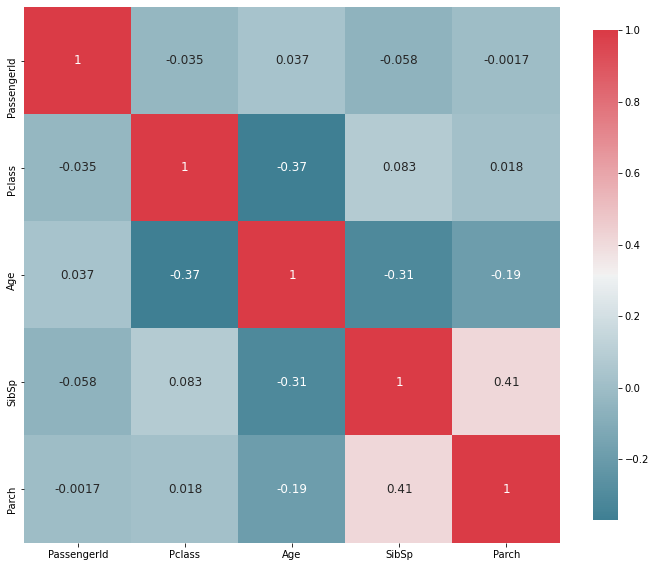

In [155]:
plot_correlation_map(df)

In [156]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }  
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()
df['Title'] = df['Name'].apply(get_title)
df = df.replace({"Title": Title_Dictionary})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.00,0,0,S,Mrs
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,S,Mrs
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.00,0,0,S,Mrs
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00,0,4,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.00,1,0,S,Mrs
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.00,2,0,S,Mrs
6,576,No,3,"Patchett, Mr. George",male,19.00,0,0,S,Mrs
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,C,Miss
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.50,0,0,S,Mrs
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.00,1,0,S,Mrs


<AxesSubplot:xlabel='Title', ylabel='count'>

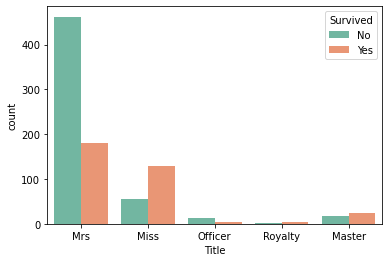

In [157]:
sns.countplot(x='Title', hue='Survived', data=df, palette="Set2",)

<AxesSubplot:xlabel='Title', ylabel='count'>

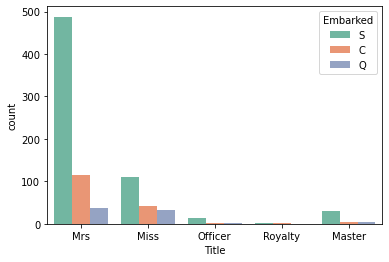

In [158]:
sns.countplot(x='Title', hue='Embarked', data=df, palette="Set2",)

In [159]:
df['Family Size'] = df['Parch']+df['SibSp']

<AxesSubplot:xlabel='Family Size', ylabel='count'>

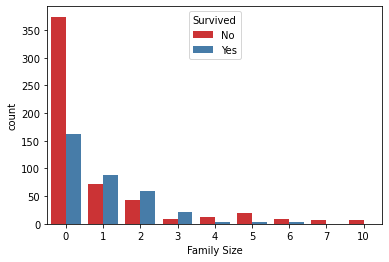

In [162]:
sns.countplot(x='Family Size', hue='Survived', data=df, palette="Set1",)

<AxesSubplot:xlabel='Family Size', ylabel='count'>

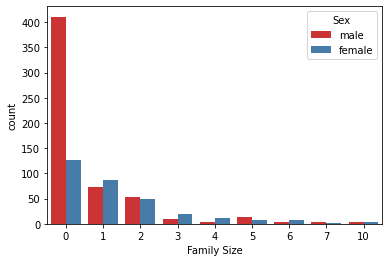

In [163]:
sns.countplot(x='Family Size', hue='Sex', data=df, palette="Set1",)